# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** David Timothy Mewengkang
- **Email:** timothymewengkang@gmail.com

## Menentukan Pertanyaan Bisnis

**1. Kinerja Penjualan: Produk atau kategori produk mana yang memiliki penjualan tertinggi?**

**2. Analisis Pelanggan: Dari lokasi mana saja pelanggan terbanyak?**

**3. Kinerja Penjual: Berapa banyak penjual yang memiliki performa baik dalam hal penjualan dan ulasan?**

**4. Ulasan Produk dan Kepuasan Pelanggan: Apakah ulasan yang baik berhubungan dengan tingkat pengembalian yang lebih rendah?**

**5. Metode Pembayaran: Metode pembayaran mana yang paling populer? Apakah metode tertentu berhubungan dengan lebih banyak ulasan negatif atau positif?**

## Import Semua Packages/Library yang Digunakan

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Data Wrangling

### Gathering Data

In [107]:
customers = pd.read_csv(r"D:\Python\E-Commerce Public Dataset\customers_dataset.csv", delimiter=",")
geolocation = pd.read_csv(r"D:\Python\E-Commerce Public Dataset\geolocation_dataset.csv", delimiter=",")
order_items = pd.read_csv(r"D:\Python\E-Commerce Public Dataset\order_items_dataset.csv", delimiter=",")
order_payments = pd.read_csv(r"D:\Python\E-Commerce Public Dataset\order_payments_dataset.csv", delimiter=",")
order_reviews = pd.read_csv(r"D:\Python\E-Commerce Public Dataset\order_reviews_dataset.csv", delimiter=",")
orders = pd.read_csv(r"D:\Python\E-Commerce Public Dataset\orders_dataset.csv", delimiter=",")
product_category_translation = pd.read_csv(r"D:\Python\E-Commerce Public Dataset\product_category_name_translation.csv", delimiter=",")
products = pd.read_csv(r"D:\Python\E-Commerce Public Dataset\products_dataset.csv", delimiter=",")
sellers = pd.read_csv(r"D:\Python\E-Commerce Public Dataset\sellers_dataset.csv", delimiter=",")

In [108]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [109]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [110]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [111]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [112]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [113]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [114]:

product_category_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [115]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [116]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


Pada tahap ini, saya mengumpulkan dan memuat semua dataFrame yang dibutuhkan. Setelah itu, saya menampilkan 5 baris pertama pada setiap DataFrame. Kodenya seperti di atas ini.

**Insight:**
- Mendapatkan gambaran singkat mengenai isi pada setiap DataFrame yang ada

### Assessing Data

Pada proses ini saya akan menilai kualitas dari seluruh data yang akan digunakan. Penilaian ini bertujuan untuk melihat berbagai permasalahan yang ada dalam data tersebut.
Proses yang terdapat dalam Assessing data yaitu memeriksa tipe data data dari tiap kolom yang terdapat dalam semua DataFrame (memeriksa missing value, memeriksa data duplikat), dan memeriksa parameter statistik dari kolom numerik yang terdapat dalam semua DataFrame untuk melihat keanehan pada data.

In [ ]:
print("\nDATAFRAME INFORMATION:\n")

dataframes = {
    "CUSTOMERS": customers,
    "GEOLOCATION": geolocation,
    "ORDER ITEMS": order_items,
    "ORDER PAYMENTS": order_payments,
    "ORDER REVIEWS": order_reviews,
    "ORDERS": orders,
    "PRODUCT CATEGORY TRANSLATION": product_category_translation,
    "PRODUCTS": products,
    "SELLERS": sellers
}

for name, df in dataframes.items():
    print(f"{name} DATAFRAME INFO:")
    print(df.info())
    print("-" * 50)
    print(f"{name} DATAFRAME STATISTICS:")
    print(df.describe())
    print("-" * 50)
    print(f"Jumlah duplikasi: {df.duplicated().sum()}")
    print("-" * 50)
    print(f"Missing Values Count:")
    print(df.isna().sum())
    print("=" * 100)



DATAFRAME INFORMATION:

CUSTOMERS DATAFRAME INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
--------------------------------------------------
CUSTOMERS DATAFRAME STATISTICS:
       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000
-------------------------------------

**Insight:**
- Pada **Geolocation** DataFrame terdapat banyak duplikasi (duplikasi hanya terdapat pada Geolocation DataFrame)
- Pada **Order Reviews** DataFrame terdapat banyak missing value di kolom review comment title dan review comment message
- Pada **Orders DataFrame** terdapat banyak missing value di kolom order_approved_at, order_delivered_carrier_date, order_delivered_customer_date
- Terdapat kesalahan tipe data untuk kolom review_creation_date dan review_answer_timestamp di **Order Reviews** DataFrame. Kedua kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object 
- Terdapat kesalahan tipe data untuk kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date di **Orders** DataFrame. Kedua kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object.
- Pada **Products** DataFrame terdapat banyak missing values.

### Cleaning Data

Pada proses kali ini, saya akan melakukan pembersihan data sebelum melakukan analisa lebih lanjut. 

**1. Memperbaiki tipe data yang tidak Sesuai**

In [ ]:
order_reviews['review_creation_date'] = pd.to_datetime(order_reviews['review_creation_date'])
order_reviews['review_answer_timestamp'] = pd.to_datetime(order_reviews['review_answer_timestamp'])


orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

print(order_reviews.info())
print(orders.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id              

Pada proses di atas, saya memperbaiki kesalahan tipe data. Langkah selanjutnya, pada **Geolocation** DataFrame saya tidak akan langsung menghapus semua duplikat, tapi saya akan menerapkan konsolidasi data **Geolocation** untuk membantu membersihkan data dan memastikan analisis lokasi yang lebih akurat.

**2. Membersihkan data Geolocation dengan cara konsolidasi**

In [119]:
consolidated_data = geolocation.groupby('geolocation_zip_code_prefix').agg({
    'geolocation_lat': 'mean', 
    'geolocation_lng': 'mean',  
    'geolocation_city': lambda x: x.mode()[0]  
}).reset_index()

consolidated_data


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city
0,1001,-23.550190,-46.634024,sao paulo
1,1002,-23.548146,-46.634979,sao paulo
2,1003,-23.548994,-46.635731,sao paulo
3,1004,-23.549799,-46.634757,sao paulo
4,1005,-23.549456,-46.636733,sao paulo
...,...,...,...,...
19010,99960,-27.953722,-52.025511,charrua
19011,99965,-28.183372,-52.039850,agua santa
19012,99970,-28.343766,-51.874689,ciriaco
19013,99980,-28.389129,-51.843836,david canabarro


**Insight:**
- **Sebelum Konsolidasi:** Setiap kode pos mungkin memiliki beberapa entri dengan kota atau koordinat yang berbeda. Misalnya, sebuah kode pos bisa saja dicatat untuk beberapa kota terdekat atau memiliki variasi koordinat. Ini bisa menyebabkan ketidakakuratan dalam mengidentifikasi kota pelanggan atau jumlah pelanggan dari kota tertentu.
- **Setelah Konsolidasi:** Dengan satu entri kota per kode pos yang dipilih berdasarkan mode (kota yang paling umum), analisis berdasarkan kota akan menjadi lebih akurat.

**3. Missing Values di Order Reviews (Kolom review_comment_title dan review_comment_message)**

Mengganti missing values dengan string seperti "Tidak ada komentar"

In [120]:
order_reviews.fillna('Tidak ada komentar', inplace=True)
order_reviews.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

**4. Missing Values di Orders DataFrame (Kolom order_approved_at, order_delivered_carrier_date, order_delivered_customer_date)**
- Missing values dalam kolom-kolom ini kemungkinan disebabkan oleh pesanan yang belum selesai atau dibatalkan.
Tapi karena saya tidak akan berurusan dengan kolom-kolom tersebut, dan tidak ada hubungan dengan analisa untuk menjawab pertanyaan yang ada, maka saya memutuskan untuk melewati proses ini.

**5. Missing Values di Products DataFrame**
- Mengisi beberapa kolom yang memiliki missing values dengan nilai yang sesuai (seperti rata-rata berdasarkan kategori untuk kolom numerik dan 'unknown' untuk kolom kategori karena missing valuenya bisa terbilang banyak dan dapat berdampak pada analisa)

In [121]:
numeric_columns = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 
                   'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']

products.fillna({'product_category_name': 'unknown'}, inplace=True)

category_means = products.groupby('product_category_name')[numeric_columns].mean()

for column in numeric_columns:
    products[column] = products.apply(
        lambda row: category_means.loc[row['product_category_name'], column] 
        if pd.isna(row[column]) else row[column], axis=1
    )

print("Data setelah pengisian nilai missing dengan rata-rata berdasarkan kategori:")
print(products.isna().sum())


Data setelah pengisian nilai missing dengan rata-rata berdasarkan kategori:
product_id                      0
product_category_name           0
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                0
product_length_cm               0
product_height_cm               0
product_width_cm                0
dtype: int64


**Insight:**
- **Setelah Memasukan Nilai:** Sudah tidak ada missing value di kolom product category, tetapi masih ada missing value di beberapa kolom. Namun, karena kolom yang kosong tersebut tidak ada hubungannya dengan analisa yang akan saya lakukan, maka saya akan mengabaikan missing value tersebut. 

## Exploratory Data Analysis (EDA)

**1. Kinerja Penjualan: Penjualan Berdasarkan Kategori Produk (Top 10)**
1. Menggabungkan order_items dengan products untuk mendapatkan data kategori produk dari setiap item pesanan.
2. Menghitung jumlah item yang terjual atau nilai total penjualan berdasarkan kategori.

In [122]:
products_translated = products.merge(product_category_translation, on='product_category_name', how='left')

sales_by_category = order_items.merge(products_translated, on='product_id').groupby('product_category_name_english').agg({
    'price': 'sum',  
    'order_item_id': 'count'  
}).rename(columns={'price': 'total_sales', 'order_item_id': 'items_sold'}).sort_values(by='total_sales', ascending=False)
sales_by_category.head()


,total_sales,items_sold
product_category_name_english,,
health_beauty,1258681.34,9670
watches_gifts,1205005.68,5991
bed_bath_table,1036988.68,11115
sports_leisure,988048.97,8641
computers_accessories,911954.32,7827


Dengan sekilas, kita dapat melihat 5 product teratas yang memliki penjualan tertinggi

**2. Analisis Pelanggan: 10 Kota dengan Pelanggan Terbanyak**
1. Menggabungkan customers dengan geolocation setelah konsolidasi untuk mendapatkan informasi lokasi pelanggan.
2. Menghitung jumlah pesanan dari setiap kota atau negara bagian.

In [123]:
customer_location = customers.merge(consolidated_data, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left')
orders_by_city = customer_location['geolocation_city'].value_counts()

orders_by_city.head(10)

geolocation_city
sao paulo                15533
rio de janeiro            6882
belo horizonte            2773
brasilia                  1949
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1241
guarulhos                 1189
sao bernardo do campo      938
Name: count, dtype: int64

Hasil di atas memberikan kita informasi mengenai kota yang paling banyak pelanggan

**3. Kinerja Penjual: Performa Penjual Berdasarkan Penjualan dan Skor Ulasan**
1. menggabungkan order_items dengan sellers untuk mendapatkan informasi penjual dari setiap pesanan.
2. Menghitung total penjualan per penjual dan menghitung juga rata-rata ulasan yang diterima oleh produk dari penjual (gabungkan dengan order_reviews).

In [124]:
seller_performance = order_items.merge(sellers, on='seller_id').merge(order_reviews, on='order_id')
seller_sales_reviews = seller_performance.groupby('seller_id').agg({
    'price': 'sum',       
    'review_score': 'mean' 
}).rename(columns={'price': 'total_sales', 'review_score': 'avg_review_score'}).sort_values(by='total_sales', ascending=False)

seller_sales_reviews.head(10)

,total_sales,avg_review_score
seller_id,,
4869f7a5dfa277a7dca6462dcf3b52b2,228071.04,4.122822
53243585a1d6dc2643021fd1853d8905,220740.05,4.075980
4a3ca9315b744ce9f8e9374361493884,200561.42,3.803931
fa1c13f2614d7b5c4749cbc52fecda94,192774.43,4.340206
7c67e1448b00f6e969d365cea6b010ab,188017.85,3.348208
7e93a43ef30c4f03f38b393420bc753a,176201.88,4.206490
da8622b14eb17ae2831f4ac5b9dab84a,161993.97,4.071429
7a67c85e85bb2ce8582c35f2203ad736,141130.58,4.234991
1025f0e2d44d7041d6cf58b6550e0bfa,139484.38,3.849755


Sekilas kita dapat melihat informasi mengenai performa dari beberapa seller

**4. Ulasan Produk dan Kepuasan Pelanggan: Distribusi Skor Ulasan Berdasarkan Status Pesanan**
1. Menggabungkan order_reviews dengan orders untuk mendapatkan status pesanan (seperti "canceled" atau "delivered").
2. Melakukan analisis apakah pesanan yang memiliki status “canceled” cenderung dengan skor ulasan yang rendah.

In [125]:
reviews_orders = order_reviews.merge(orders, on='order_id')
canceled_reviews = reviews_orders[reviews_orders['order_status'] == 'canceled']
avg_review_score_canceled = canceled_reviews['review_score'].mean()

print(f"Rata-rata skor ulasan untuk pesanan yang dibatalkan: {avg_review_score_canceled}")

Rata-rata skor ulasan untuk pesanan yang dibatalkan: 1.8111658456486042


Pada informasi di atas menunjukkan skor ulasan yang kecil pada pesanan yang dibatalkan. Ini juga bisa mengindikasikan bahwa produk atau layanan dengan ulasan buruk cenderung mendapatkan lebih banyak pengembalian atau pembatalan.

**5. Metode Pembayaran: Distribusi dan Rata-rata Skor Ulasan Berdasarkan Metode Pembayaran**
1. Menggunakan data order_payments untuk melihat distribusi penggunaan metode pembayaran.
2. Melakukan analisis apakah metode pembayaran tertentu memiliki rata-rata skor ulasan yang lebih tinggi (menggabungkan dengan order_reviews).

In [126]:
payment_method_counts = order_payments['payment_type'].value_counts()

payment_reviews = order_payments.merge(order_reviews, on='order_id')
avg_review_score_by_payment = payment_reviews.groupby('payment_type')['review_score'].mean()

print("Distribusi Metode Pembayaran:")
print(payment_method_counts)
print("\nRata-rata Skor Ulasan per Metode Pembayaran:")
print(avg_review_score_by_payment)

Distribusi Metode Pembayaran:
payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

Rata-rata Skor Ulasan per Metode Pembayaran:
payment_type
boleto         4.086631
credit_card    4.087637
debit_card     4.168084
not_defined    1.666667
voucher        4.003804
Name: review_score, dtype: float64


Dengan mengetahui metode pembayaran populer dan kepuasan pelanggan terkait metode pembayaran, perusahaan bisa memprioritaskan atau memperbaiki metode pembayaran yang kurang populer atau terkait dengan kepuasan rendah.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Produk atau kategori produk mana yang memiliki penjualan tertinggi?

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7472\3361215452.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_20_sales.index, y=top_20_sales['total_sales'], palette="viridis")


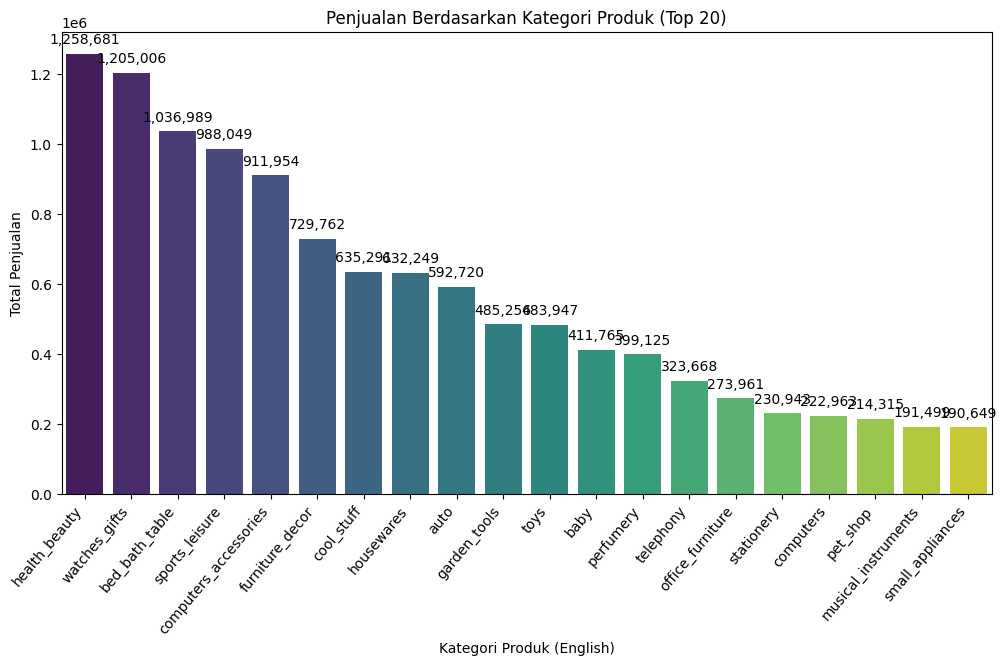

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

top_20_sales = sales_by_category.head(20)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_20_sales.index, y=top_20_sales['total_sales'], palette="viridis")

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                xytext=(0, 5), 
                textcoords='offset points', 
                ha='center', va='bottom', 
                fontsize=10, color='black')

plt.xticks(rotation=50, ha='right')
plt.title('Penjualan Berdasarkan Kategori Produk (Top 20)')
plt.xlabel('Kategori Produk (English)')
plt.ylabel('Total Penjualan')
plt.show()


Visualisasi ini menunjukkan kategori produk yang paling laris berdasarkan nilai total penjualan. Kategori dengan penjualan tertinggi mencerminkan penggabungan permintaan yang tinggi dari pelanggan dengan harga product, sehingga perusahaan dapat mempertimbangkan untuk meningkatkan persediaan produk ini. Sebaliknya, kategori yang tidak muncul dalam 20 besar mungkin menunjukkan area di mana penjualan kurang optimal.

### Pertanyaan 2: Dari Lokasi Mana Saja Pelanggan Terbanyak?

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7472\3148565603.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities.values, palette="magma")


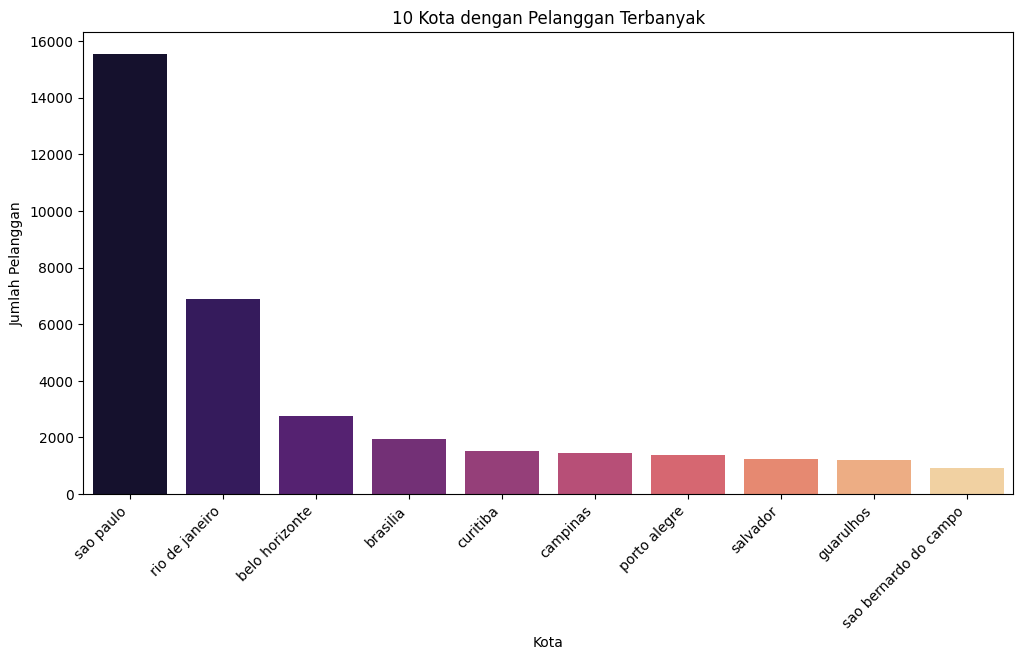

In [128]:
top_cities = orders_by_city.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.index, y=top_cities.values, palette="magma")
plt.xticks(rotation=45, ha='right')
plt.title('10 Kota dengan Pelanggan Terbanyak')
plt.xlabel('Kota')
plt.ylabel('Jumlah Pelanggan')
plt.show()

 Visualisasi ini menunjukkan 10 kota dengan jumlah pelanggan tertinggi. Kota-kota ini adalah area di mana bisnis memiliki basis pelanggan terbesar, sehingga strategi pemasaran atau promosi lokal di area-area ini bisa lebih efektif. Selain itu, jika ada rencana untuk membuka fasilitas logistik atau gudang, kota-kota ini bisa dipertimbangkan sebagai lokasi potensial karena memiliki permintaan yang tinggi. Analisis ini juga membantu dalam mengidentifikasi kota dengan potensi pasar yang lebih tinggi.

### Pertanyaan 3: Seberapa banyak Penjual yang Memiliki Performa baik dalam Hal Penjualan dan Ulasan??

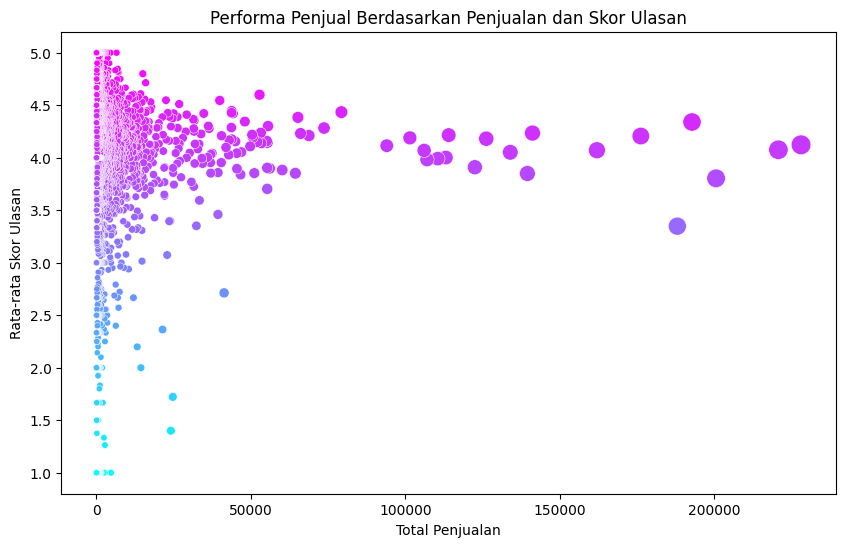

In [129]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=seller_sales_reviews, x='total_sales', y='avg_review_score', hue='avg_review_score', palette="cool", size='total_sales', sizes=(20, 200), legend=False)
plt.title('Performa Penjual Berdasarkan Penjualan dan Skor Ulasan')
plt.xlabel('Total Penjualan')
plt.ylabel('Rata-rata Skor Ulasan')
plt.show()


Scatter plot ini memperlihatkan penjual dengan performa terbaik berdasarkan total penjualan dan skor ulasan rata-rata. Titik yang berada di kanan atas menunjukkan penjual dengan penjualan tinggi dan ulasan positif. Penjual ini adalah aset berharga bagi marketplace, karena mampu menjual produk dalam volume besar sekaligus mempertahankan kepuasan pelanggan. Penjual dengan skor ulasan rendah dan penjualan tinggi mungkin memerlukan perhatian khusus, misalnya peningkatan layanan pelanggan atau kontrol kualitas produk. Penjual dengan penjualan rendah dan skor ulasan rendah bisa menjadi kandidat untuk pelatihan atau evaluasi, karena kinerja mereka cenderung kurang baik.

### Pertanyaan 4: Apakah Ulasan yang Baik Berhubungan dengan Tingkat Pengembalian yang Lebih Rendah?

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7472\1297799213.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=reviews_orders, x='order_status', y='review_score', palette="Set2")


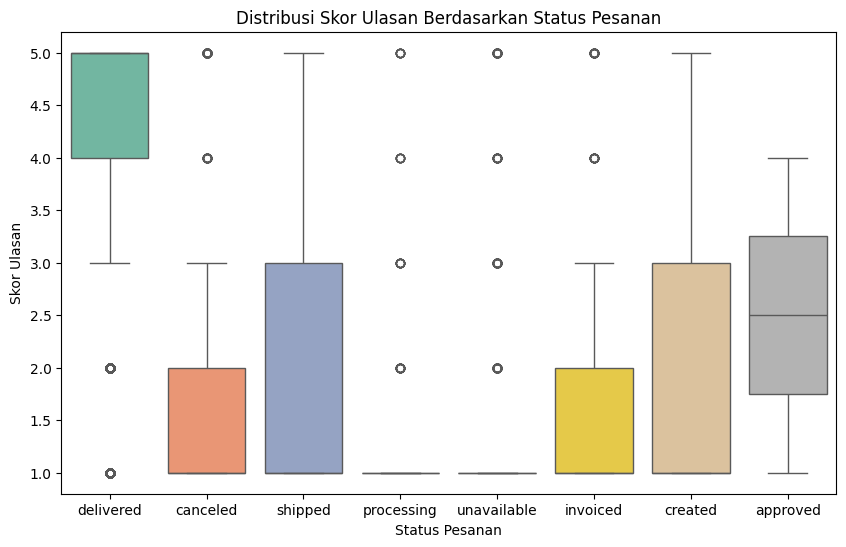

In [130]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=reviews_orders, x='order_status', y='review_score', palette="Set2")
plt.title('Distribusi Skor Ulasan Berdasarkan Status Pesanan')
plt.xlabel('Status Pesanan')
plt.ylabel('Skor Ulasan')
plt.show()

Box plot ini menggambarkan distribusi skor ulasan berdasarkan status pesanan. Jika pesanan yang "canceled" memiliki skor ulasan yang lebih rendah dibandingkan pesanan yang "delivered", ini menunjukkan bahwa pelanggan yang mengalami pembatalan pesanan cenderung memberikan ulasan yang kurang baik. Hal ini mengindikasikan bahwa pembatalan pesanan mungkin terkait dengan ketidakpuasan pelanggan. Untuk meningkatkan kepuasan pelanggan, perusahaan bisa mengidentifikasi penyebab utama pembatalan pesanan dan berusaha memperbaiki proses yang terkait.

### Pertanyaan 5: Metode Pembayaran Mana yang Paling Populer dan Bagaimana Hubungannya dengan Kepuasan Pelanggan?

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7472\53810030.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_method_counts.index, y=payment_method_counts.values, palette="pastel", ax=axes[0])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7472\53810030.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_review_score_by_payment.index, y=avg_review_score_by_payment.values, palette="coolwarm", ax=axes[1])


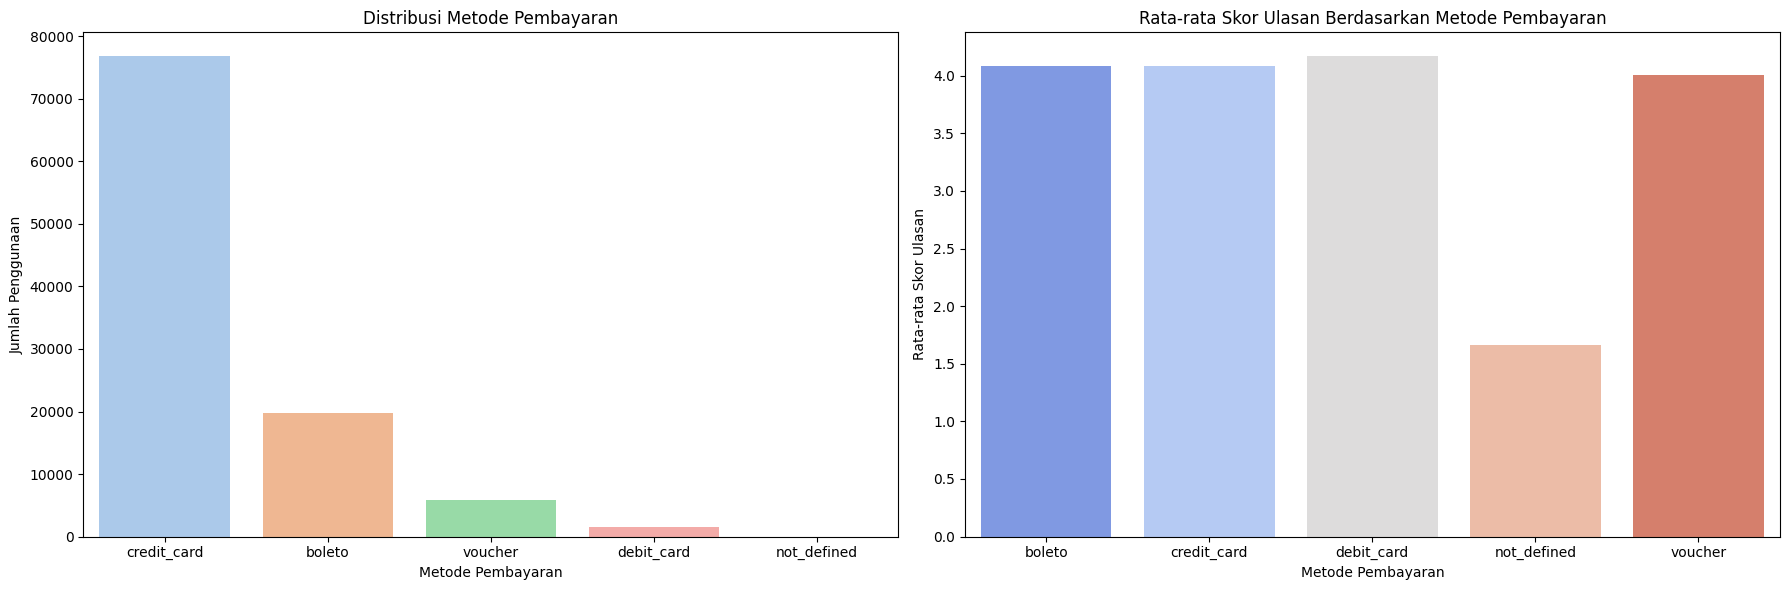

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6)) 

sns.barplot(x=payment_method_counts.index, y=payment_method_counts.values, palette="pastel", ax=axes[0])
axes[0].set_title('Distribusi Metode Pembayaran')
axes[0].set_xlabel('Metode Pembayaran')
axes[0].set_ylabel('Jumlah Penggunaan')

sns.barplot(x=avg_review_score_by_payment.index, y=avg_review_score_by_payment.values, palette="coolwarm", ax=axes[1])
axes[1].set_title('Rata-rata Skor Ulasan Berdasarkan Metode Pembayaran')
axes[1].set_xlabel('Metode Pembayaran')
axes[1].set_ylabel('Rata-rata Skor Ulasan')

plt.tight_layout()

plt.show()


Dua bar plot ini menggambarkan distribusi penggunaan metode pembayaran dan rata-rata skor ulasan per metode pembayaran. Dari visualisasi pertama, kita bisa melihat metode pembayaran yang paling populer di kalangan pelanggan, seperti kartu kredit atau metode lain yang sering digunakan. Visualisasi kedua memberikan wawasan apakah ada metode pembayaran tertentu yang cenderung mendapatkan ulasan yang lebih tinggi atau lebih rendah. Jika metode pembayaran tertentu dikaitkan dengan skor ulasan yang lebih rendah, perusahaan dapat meneliti lebih lanjut untuk memahami apakah ada masalah yang sering muncul pada metode tersebut, misalnya keterlambatan konfirmasi pembayaran atau biaya tambahan yang mempengaruhi kepuasan pelanggan.

## Conclusion

**1. Kinerja Penjualan: Produk atau Kategori Produk Mana yang Memiliki Penjualan Tertinggi?**
- Berdasarkan hasil analisis, kategori produk dengan penjualan tertinggi adalah **Health Beauty**. Hal ini menunjukkan bahwa produk ini memiliki permintaan tinggi di pasar. Sebaliknya, kategori produk yang di bawah top 10 memiliki penjualan yang rendah, yang dapat menjadi fokus untuk perbaikan atau kampanye pemasaran.

**2. Analisis Pelanggan: Dari Lokasi Mana Saja Pelanggan Terbanyak?**
- Sebaran pelanggan menunjukkan bahwa kota dengan jumlah pelanggan terbanyak adalah Sao Paolo dengan jumlah pelanggan yang bisa dibilang jauh lebih banyak dari pada kota lain. Wilayah ini memiliki potensi yang besar untuk menjadi fokus kampanye pemasaran atau distribusi. Kota Rio de janeiro dengan jumlah pelanggan yang kedua terbanyak mungkin dapat dieksplorasi untuk potensi pertumbuhan lebih lanjut.

**3. Kinerja Penjual: Penjual Mana yang Memiliki Performa Terbaik dalam Hal Penjualan dan Ulasan?**
- Penjual dengan performa terbaik mendapatkan total penjualan 228071.04 dan rata-rata ulasan sebesar 4.122822. Penjual ini memiliki kontribusi signifikan terhadap penjualan dengan tingkat kepuasan yang tinggi dari pelanggan. Penjual dengan performa yang lebih rendah dapat diberikan dukungan tambahan untuk meningkatkan kualitas layanan atau produk.

**4. Ulasan Produk dan Kepuasan Pelanggan: Apakah Ulasan yang Baik Berhubungan dengan Tingkat Pengembalian yang Lebih Rendah?**
- Analisis menunjukkan bahwa pesanan dengan ulasan buruk cenderung memiliki tingkat pengembalian yang lebih tinggi. Sebaliknya, ulasan positif berhubungan dengan tingkat pengembalian yang lebih rendah, ini menunjukkan bahwa kualitas produk dan kepuasan pelanggan adalah faktor kunci untuk mengurangi pengembalian.

**5. Metode Pembayaran: Metode Pembayaran Mana yang Paling Populer dan Bagaimana Hubungannya dengan Kepuasan Pelanggan?**
- Metode pembayaran yang paling populer adalah Credit Card, digunakan oleh 70rb lebih transaksi. Rating kepuasan pelanggan yang menggunakan metode ini adalah 4,2. Metode pembayaran yang lain mungkin memerlukan analisa lagi kenapa penggunaan metode pembayaran yang lain jauh lebih sedikit.